In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0,parse_dates=True,index_col='Month')

In [3]:
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [4]:
series = series.dropna()

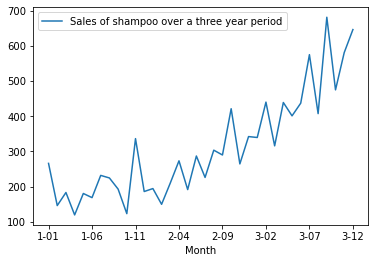

In [5]:
series.plot()
plt.show()

In [6]:
X = series.values

In [7]:
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [8]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [9]:
train, test = X[0:size], X[size:len(X)]

In [13]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

Predicted=264.8267901167129,Expected =[421.6]
Predicted=309.42912486584777,Expected =[264.5]
Predicted=343.2721804142173,Expected =[342.3]
Predicted=293.32967411680767,Expected =[339.7]
Predicted=368.6689556923214,Expected =[440.4]
Predicted=335.044740638034,Expected =[315.9]
Predicted=363.2202215171502,Expected =[439.3]
Predicted=357.64532347323683,Expected =[401.3]
Predicted=443.04783536696334,Expected =[437.4]
Predicted=378.3656734866571,Expected =[575.5]
Predicted=459.41502048414446,Expected =[407.6]
Predicted=526.8908755663845,Expected =[682.]
Predicted=457.23127476167883,Expected =[475.3]
Predicted=672.9149433869607,Expected =[581.3]
Predicted=531.5414492158278,Expected =[646.9]
TEST MSE :8641.212975394004


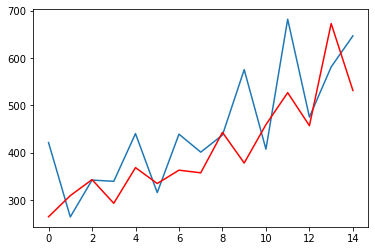

In [14]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()